# my first notebook

In [1]:
import pandas as pd
import numpy as np

In [2]:
# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv('input/train.csv')

In [4]:
df.columns.values

array(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], dtype=object)

In [5]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [7]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
df.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Jacobsohn, Mr. Sidney Samuel",male,347082,B96 B98,S
freq,1,577,7,4,644


In [9]:
df[['Pclass', 'Survived']].groupby(['Pclass']).mean()

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


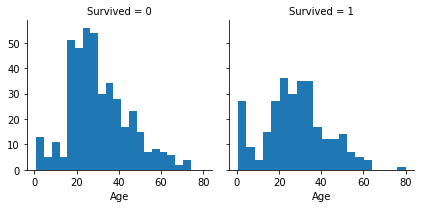

In [10]:
g = sns.FacetGrid(df, col='Survived')
g.map(plt.hist, 'Age', bins=20)

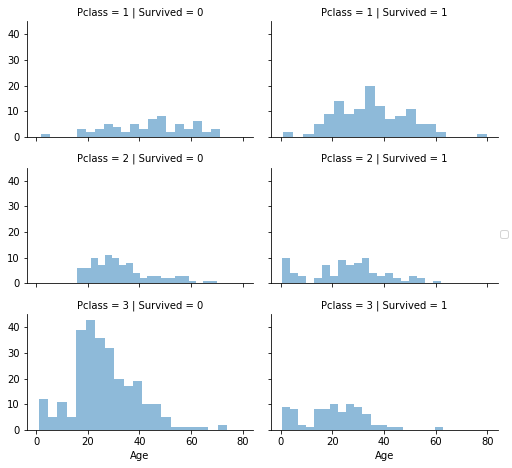

In [11]:
grid = sns.FacetGrid(df, col='Survived', row='Pclass', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend();

In [12]:
# value counts
df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [13]:
# 最頻値
# The mode of a set of data values is the value that appears most often
df['Embarked'].mode()[0]

'S'

In [15]:
df['Embarked'].fillna('S', inplace=True)
df.describe(include='all')


0    0
1    1
2    0
Name: Embarked, dtype: int64

In [18]:
embarked = df['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)
embarked.head(3)

0    0
1    1
2    0
Name: Embarked, dtype: int64

In [19]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

## ざっくり欠損確認する

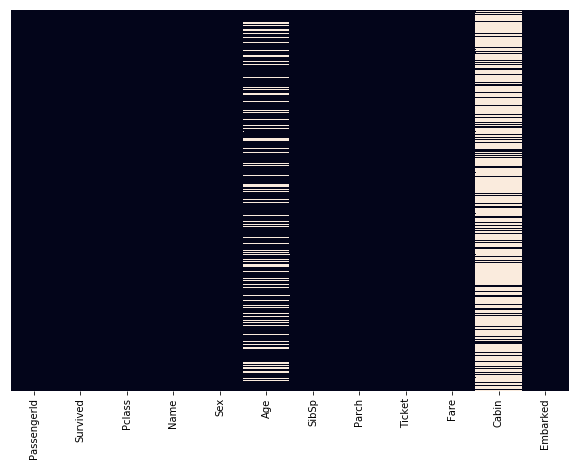

In [22]:
plt.figure(figsize=(10,7))
sns.heatmap(df.isnull(), yticklabels=False, cbar=False)

## bandに分ける

In [30]:
pd.cut(df['Age'].dropna(), 5, labels=[1, 2, 3, 4, 5]).astype(int)

0      2
1      3
2      2
3      3
4      3
6      4
7      1
8      2
9      1
10     1
11     4
12     2
13     3
14     1
15     4
16     1
18     2
20     3
21     3
22     1
23     2
24     1
25     3
27     2
30     3
33     5
34     2
35     3
37     2
38     2
      ..
856    3
857    4
858    2
860    3
861    2
862    3
864    2
865    3
866    2
867    2
869    1
870    2
871    3
872    3
873    3
874    2
875    1
876    2
877    2
879    4
880    2
881    3
882    2
883    2
884    2
885    3
886    2
887    2
889    2
890    2
Name: Age, Length: 714, dtype: int64

In [51]:
cabin = df.Cabin.fillna('U').apply(lambda x: x[0])
df_cabin = pd.DataFrame({ "Cabin": cabin, "Survived": df.Survived })
df_cabin.groupby(['Cabin']).agg(['mean', 'count'])

# df.Survived.mean()

# g_cabin = sns.FacetGrid(df_cabin, col='Cabin', col_wrap=5)
# g_cabin.map(plt.hist, 'Survived', bins=20)

Survived      
           mean count
Cabin                
A      0.466667    15
B      0.744681    47
C      0.593220    59
D      0.757576    33
E      0.750000    32
F      0.615385    13
G      0.500000     4
T      0.000000     1
U      0.299854   687